## 1. Load the Dataset

In [4]:
import pandas as pd

# Correct the file path (use raw string or escape the backslashes)
df = pd.read_csv(r'C:\Users\ishim\Downloads\Hackathon stuff\Amazon original dataset\Amazon Sale Report.csv')

# Check the first few rows to ensure everything is loaded correctly
df.head()

C:\Users\ishim\AppData\Local\Temp\ipykernel_6012\2053918674.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\ishim\Downloads\Hackathon stuff\Amazon original dataset\Amazon Sale Report.csv')


,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


## 2: Check Data Types and Missing Values

In [6]:
# Check the data types of each column
print("\nData Types:\n", df.dtypes)

# Check for missing values in each column
print("\nMissing Values per Column:\n", df.isnull().sum())


Data Types:
 index                   int64
Order ID               object
Date                   object
Status                 object
Fulfilment             object
Sales Channel          object
ship-service-level     object
Style                  object
SKU                    object
Category               object
Size                   object
ASIN                   object
Courier Status         object
Qty                     int64
currency               object
Amount                float64
ship-city              object
ship-state             object
ship-postal-code      float64
ship-country           object
promotion-ids          object
B2B                      bool
fulfilled-by           object
Unnamed: 22            object
dtype: object

Missing Values per Column:
 index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0

## 3: Handle Missing Data and Data Types

### 3.1. Convert the 'Date' Column to Datetime

In [9]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m-%d-%y')

### 3.2.Handle Missing Values

In [11]:
# Fill missing numerical values with the median
df['Amount'].fillna(df['Amount'].median(), inplace=True)
df['Qty'].fillna(df['Qty'].median(), inplace=True)

# Fill missing categorical values with 'Unknown'
df['Courier Status'].fillna('Unknown', inplace=True)
df['currency'].fillna('Unknown', inplace=True)
df['ship-city'].fillna('Unknown', inplace=True)
df['ship-state'].fillna('Unknown', inplace=True)
df['ship-postal-code'].fillna('Unknown', inplace=True)
df['ship-country'].fillna('Unknown', inplace=True)
df['promotion-ids'].fillna('Unknown', inplace=True)
df['fulfilled-by'].fillna('Unknown', inplace=True)

# Verify if there are any remaining missing values
print("\nMissing Values after cleaning:\n", df.isnull().sum())

C:\Users\ishim\AppData\Local\Temp\ipykernel_6012\1357657594.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(df['Amount'].median(), inplace=True)
C:\Users\ishim\AppData\Local\Temp\ipykernel_6012\1357657594.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F


Missing Values after cleaning:
 index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                 0
ship-state                0
ship-postal-code          0
ship-country              0
promotion-ids             0
B2B                       0
fulfilled-by              0
Unnamed: 22           49050
dtype: int64


### 3.3. Drop Unnecessary Column

In [13]:
# Drop irrelevant column 'Unnamed: 22'
df.drop(['Unnamed: 22'], axis=1, inplace=True)

# Verify the columns after cleanup
print("\nColumns after cleanup:", df.columns)



 Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by'],
      dtype='object')


In [14]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_amazon_sales.csv', index=False)

print("Cleaned data saved successfully!")

Cleaned data saved successfully!


In [15]:
# Display the first few rows of the cleaned dataset
print("\nFirst few rows of the cleaned data:")
print(df.head())


First few rows of the cleaned data:
   index             Order ID       Date                        Status  \
0      0  405-8078784-5731545 2022-04-30                     Cancelled   
1      1  171-9198151-1101146 2022-04-30  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146 2022-04-30                       Shipped   
3      3  403-9615377-8133951 2022-04-30                     Cancelled   
4      4  407-1069790-7240320 2022-04-30                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... Qty currency  Amount    ship-city   shi

In [16]:
# Check the number of rows and columns in the dataset
print(f"Data shape: {df.shape}")

Data shape: (128975, 23)


# 4.  Exploratory Data Analysis (EDA)

## 4.1: Summary Statistics

In [19]:
# Display summary statistics for numerical columns
print("\nSummary Statistics for Numerical Columns:")
print(df.describe()) 


Summary Statistics for Numerical Columns:
               index                           Date            Qty  \
count  128975.000000                         128975  128975.000000   
mean    64487.000000  2022-05-12 11:49:27.951928576       0.904431   
min         0.000000            2022-03-31 00:00:00       0.000000   
25%     32243.500000            2022-04-20 00:00:00       1.000000   
50%     64487.000000            2022-05-10 00:00:00       1.000000   
75%     96730.500000            2022-06-04 00:00:00       1.000000   
max    128974.000000            2022-06-29 00:00:00      15.000000   
std     37232.019822                            NaN       0.313354   

              Amount  
count  128975.000000  
mean      645.928694  
min         0.000000  
25%       459.000000  
50%       605.000000  
75%       771.000000  
max      5584.000000  
std       272.778829  


## 4.2: Visualize the Distribution of Sales (Amount)

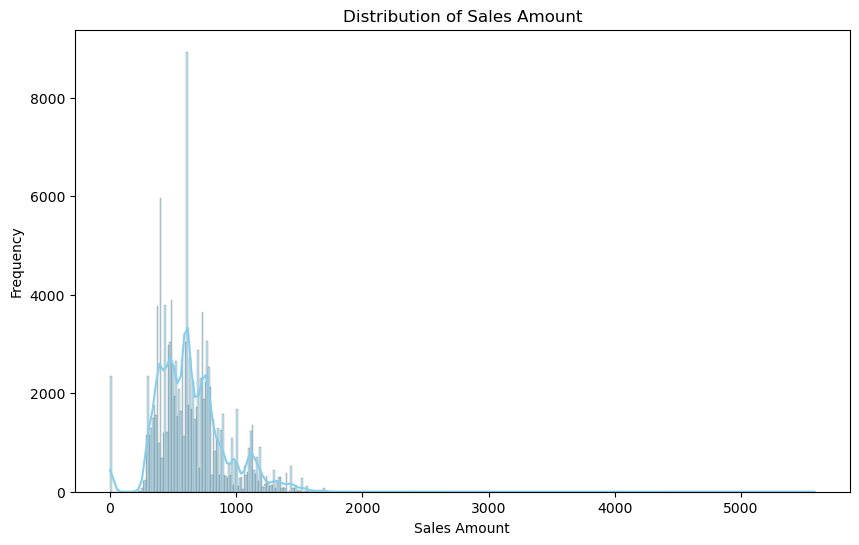

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of sales amounts
plt.figure(figsize=(10, 6))
sns.histplot(df['Amount'], kde=True, color='skyblue')
plt.title('Distribution of Sales Amount')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.show()

## 4.3: Visualize the Distribution of Quantities Sold

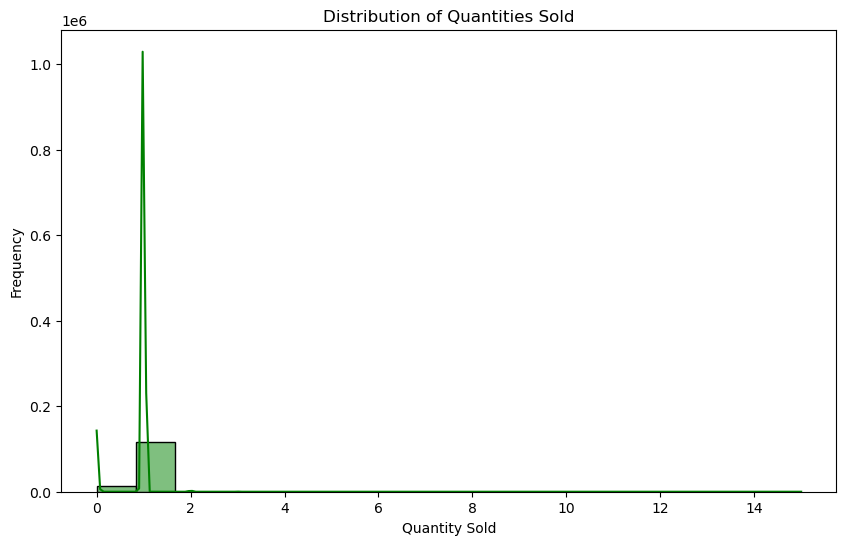

In [23]:
# Plot the distribution of quantities sold
plt.figure(figsize=(10, 6))
sns.histplot(df['Qty'], kde=True, color='green')
plt.title('Distribution of Quantities Sold')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.show()

## 4.4: Sales by Ship-City (Location-Based Analysis)

C:\Users\ishim\AppData\Local\Temp\ipykernel_6012\334222701.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_city, x='Amount', y='ship-city', palette='viridis')
C:\Users\ishim\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2354 (\N{DEVANAGARI LETTER LA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ishim\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Matplotlib currently does not support Devanagari natively.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ishim\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 2326 (\N{DEVANAGARI LETTER KHA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\ishim\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: Use

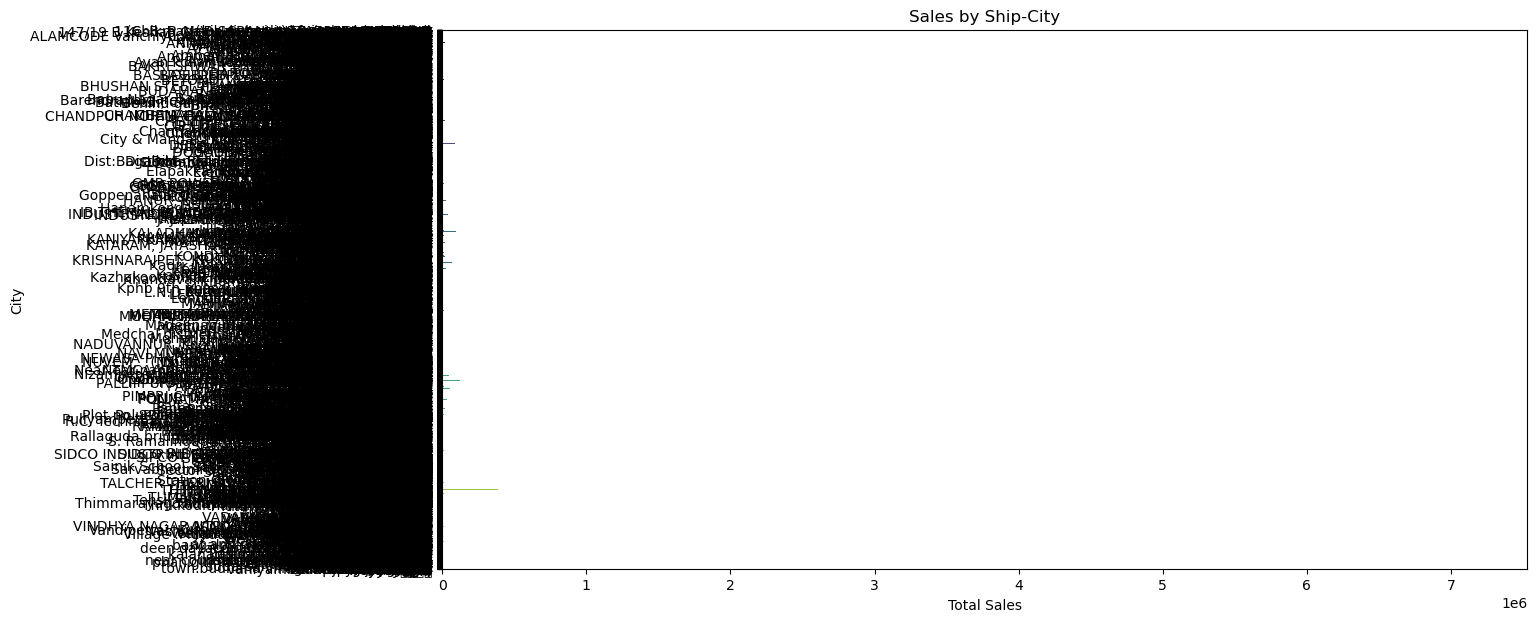

In [25]:
# Group sales by 'ship-city' and plot total sales for each city
sales_by_city = df.groupby('ship-city')['Amount'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(data=sales_by_city, x='Amount', y='ship-city', palette='viridis')
plt.title('Sales by Ship-City')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()


## 4.5: Sales by Fulfillment Type

C:\Users\ishim\AppData\Local\Temp\ipykernel_6012\1482987181.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_by_fulfilment, x='Amount', y='Fulfilment', palette='Blues')


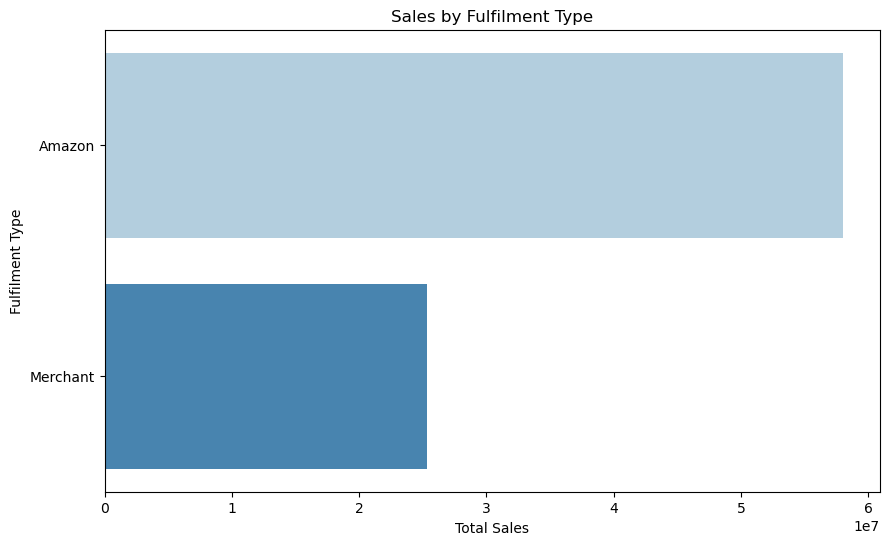

In [27]:
# Group sales by 'Fulfilment' and plot total sales for each type
sales_by_fulfilment = df.groupby('Fulfilment')['Amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=sales_by_fulfilment, x='Amount', y='Fulfilment', palette='Blues')
plt.title('Sales by Fulfilment Type')
plt.xlabel('Total Sales')
plt.ylabel('Fulfilment Type')
plt.show()


## 4.5: Correlation Between Sales and Quantity

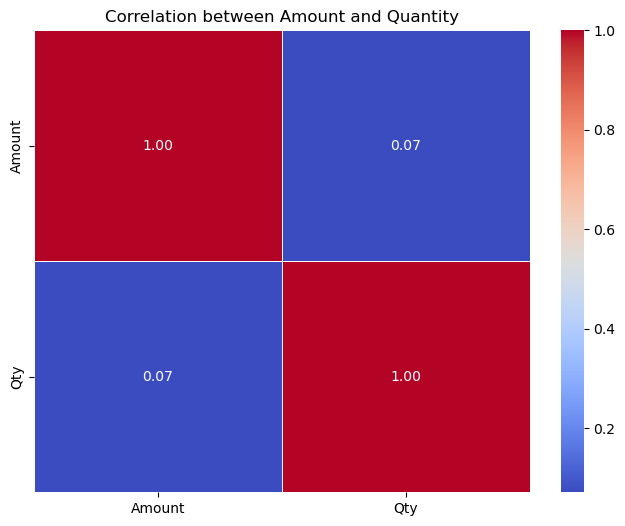

In [29]:
# Compute the correlation between Amount and Qty
correlation_matrix = df[['Amount', 'Qty']].corr()

# Plot the heatmap for the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Amount and Quantity')
plt.show()

# 5.forecasting using Prophet

## 5.1: Prepare the Data for Prophet

In [32]:
# Prepare the data for Prophet
df_prophet = df[['Date', 'Amount']].rename(columns={'Date': 'ds', 'Amount': 'y'})

# Check the first few rows to ensure it's correctly formatted
df_prophet.head()

,ds,y
0,2022-04-30,647.62
1,2022-04-30,406.00
2,2022-04-30,329.00
3,2022-04-30,753.33
4,2022-04-30,574.00


In [33]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.


## 5.2: Create and Train the Prophet Model

In [35]:
from prophet import Prophet

# Initialize the Prophet model
model = Prophet()

# Fit the model to the historical sales data
model.fit(df_prophet)

10:02:48 - cmdstanpy - INFO - Chain [1] start processing
10:03:08 - cmdstanpy - INFO - Chain [1] done processing


## 5.3: Make Predictions

In [37]:
from prophet import Prophet

In [38]:
pip install --upgrade prophet

## 5.1-3: Preparing the Data and Making Predictions

In [46]:
import pandas as pd
from prophet import Prophet

# Assuming df is your dataset and you have already loaded it

# Step 1: Prepare the data by grouping by date
sales_by_date = df.groupby('Date')['Amount'].sum().reset_index()  # Group by 'Date' and sum 'Amount'
sales_by_date.columns = ['ds', 'y']  # 'ds' for date and 'y' for sales value

# Step 2: Initialize Prophet model
model = Prophet()

# Step 3: Fit the model on historical data
model.fit(sales_by_date)

# Step 4: Generate future dates for 30 days (manually specifying future dates)
future_dates = pd.date_range(sales_by_date['ds'].max(), periods=31, freq='D')[1:]  # Avoid the last date in the dataset

# Step 5: Create a new DataFrame for future predictions
future_df = pd.DataFrame({'ds': future_dates})

# Step 6: Make predictions
forecast = model.predict(future_df)

# Show the forecasted values
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

10:48:57 - cmdstanpy - INFO - Chain [1] start processing
10:48:58 - cmdstanpy - INFO - Chain [1] done processing


           ds           yhat     yhat_lower    yhat_upper
0  2022-06-30  716072.243111  530747.390237  9.012649e+05
1  2022-07-01  754864.555327  570425.033679  9.497081e+05
2  2022-07-02  793241.035145  597433.063260  9.852711e+05
3  2022-07-03  849072.059966  657511.686190  1.034997e+06
4  2022-07-04  794195.715217  594218.327113  9.744339e+05
5  2022-07-05  810125.894934  610664.749303  1.000111e+06
6  2022-07-06  791062.322343  604283.742255  9.905271e+05
7  2022-07-07  697705.343942  509839.303147  8.903605e+05
8  2022-07-08  736497.656159  545885.274169  9.308439e+05
9  2022-07-09  774874.135977  597147.126912  9.810210e+05
10 2022-07-10  830705.160798  642941.370408  1.007942e+06
11 2022-07-11  775828.816049  595321.551395  9.570912e+05
12 2022-07-12  791758.995766  607742.532279  9.733332e+05
13 2022-07-13  772695.423175  579757.104444  9.570276e+05
14 2022-07-14  679338.444774  492691.648602  8.785300e+05
15 2022-07-15  718130.756990  529285.851647  8.938637e+05
16 2022-07-16 

## 5.4: Plotting the Forecasted Data

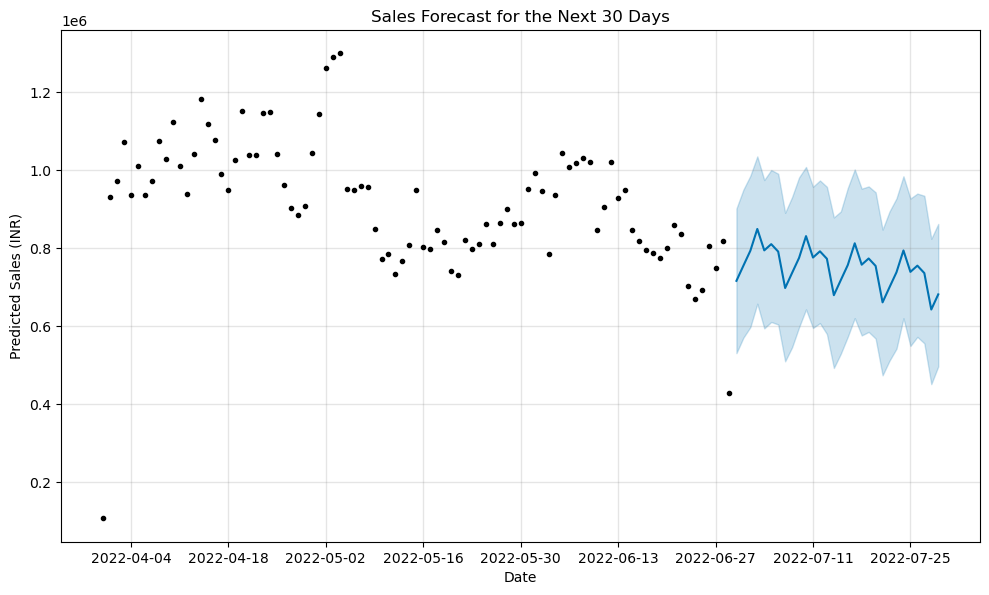

In [48]:
import matplotlib.pyplot as plt

# Plot the forecasted data
model.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Predicted Sales (INR)')
plt.title('Sales Forecast for the Next 30 Days')
plt.show()

In [54]:
# Save forecasted data to CSV
forecast.to_csv("sales_forecast.csv", index=False)
print("Sales forecast saved successfully!")

Sales forecast saved successfully!
